In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
train=pd.read_csv('/content/sample_data/train.csv')
df=train.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [88]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [89]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [90]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [91]:
df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [92]:
df.drop(['casual','registered'],axis=1,inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


<AxesSubplot:>

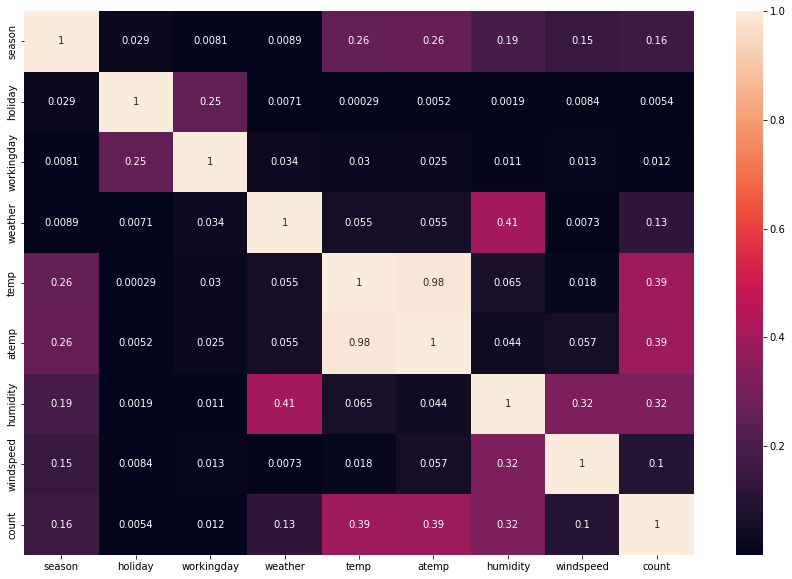

In [93]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(np.abs(df.corr()),annot=True)

In [94]:
pclass_count = df.groupby('season')['season'].count()
pclass_count

season
1    2686
2    2733
3    2733
4    2734
Name: season, dtype: int64

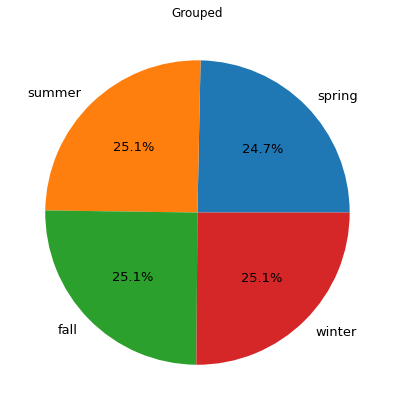

In [95]:
plt.figure(figsize=(7,7))
plt.title('Grouped')
plt.pie(pclass_count.values, labels=['spring', 'summer', 'fall','winter'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [96]:
pclass_count = df.groupby('weather')['weather'].count()
pclass_count

weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

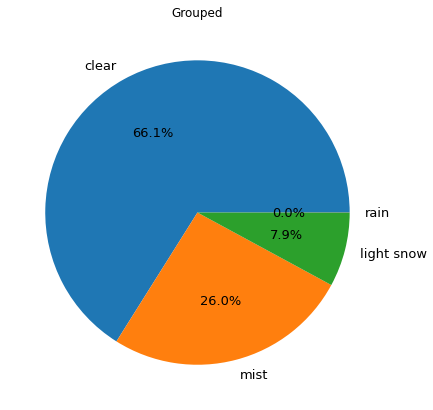

In [97]:
plt.figure(figsize=(7,7))
plt.title('Grouped')
plt.pie(pclass_count.values, labels=['clear', 'mist', 'light snow','rain'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

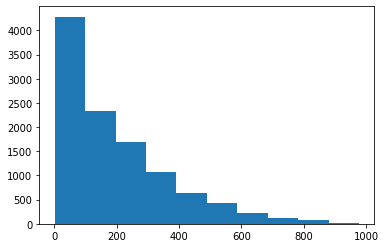

In [98]:
plt.hist(df['count']);

In [99]:
pclass_count = df.groupby('holiday')['holiday'].count()
pclass_count

holiday
0    10575
1      311
Name: holiday, dtype: int64

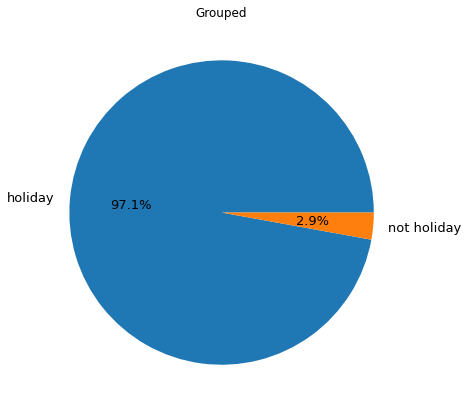

In [100]:
plt.figure(figsize=(7,7))
plt.title('Grouped')
plt.pie(pclass_count.values, labels=['holiday','not holiday'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [101]:
pclass_count = df.groupby('workingday')['workingday'].count()
pclass_count

workingday
0    3474
1    7412
Name: workingday, dtype: int64

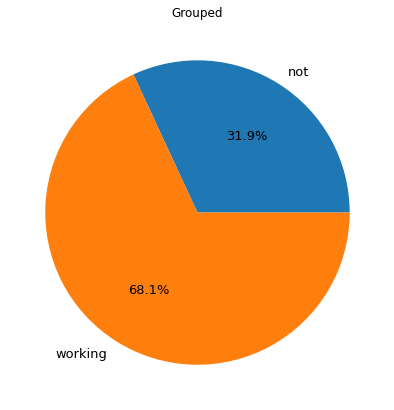

In [102]:
plt.figure(figsize=(7,7))
plt.title('Grouped')
plt.pie(pclass_count.values, labels=['not','working'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

<AxesSubplot:>

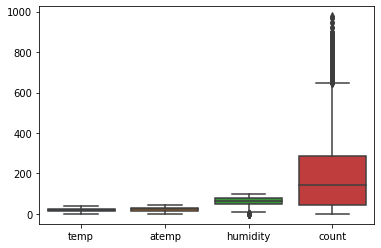

In [103]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity','count']])


<AxesSubplot:xlabel='temp', ylabel='count'>

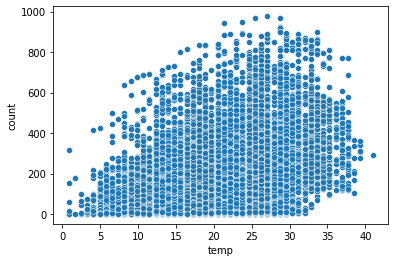

In [104]:
sns.scatterplot(data=df,x='temp',y='count')

<AxesSubplot:xlabel='atemp', ylabel='count'>

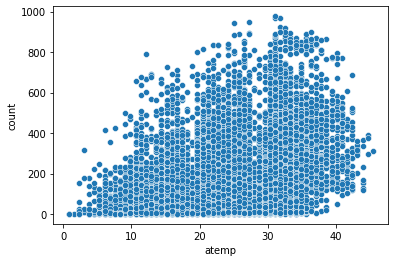

In [105]:
sns.scatterplot(data=df,x='atemp',y='count')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

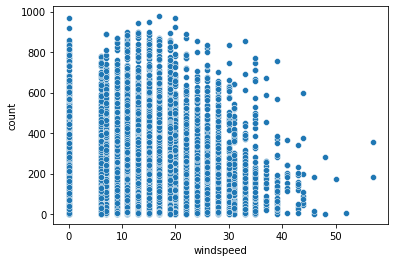

In [106]:
sns.scatterplot(data=df,x='windspeed',y='count')

<AxesSubplot:xlabel='humidity', ylabel='count'>

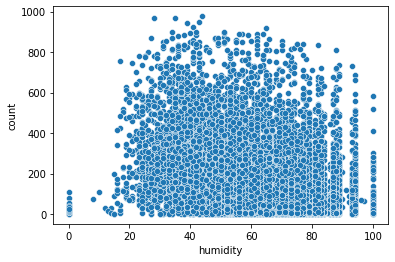

In [107]:
sns.scatterplot(data=df,x='humidity',y='count')

In [108]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [109]:
df=pd.get_dummies(df,columns=['season'],prefix='season')

In [110]:
df

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0000,16,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0000,40,1,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0000,32,1,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0000,13,1,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0000,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,1,15.58,19.695,50,26.0027,336,0,0,0,1
10882,2012-12-19 20:00:00,0,1,1,14.76,17.425,57,15.0013,241,0,0,0,1
10883,2012-12-19 21:00:00,0,1,1,13.94,15.910,61,15.0013,168,0,0,0,1
10884,2012-12-19 22:00:00,0,1,1,13.94,17.425,61,6.0032,129,0,0,0,1


In [111]:
df=pd.get_dummies(df,columns=['weather'],prefix='weather')

In [112]:
df

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,0,0,0,1,1,0,0,0
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,0,0,0,1,1,0,0,0
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,0,0,0,1,1,0,0,0
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,129,0,0,0,1,1,0,0,0


In [113]:
df['year']=df['datetime'].str[:4]

In [114]:
df

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,1,0,0,0,1,0,0,0,2011
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,1,0,0,0,1,0,0,0,2011
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,1,0,0,0,1,0,0,0,2011
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,1,0,0,0,1,0,0,0,2011
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,1,0,0,0,1,0,0,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,0,0,0,1,1,0,0,0,2012
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,0,0,0,1,1,0,0,0,2012
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,0,0,0,1,1,0,0,0,2012
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,129,0,0,0,1,1,0,0,0,2012


In [115]:
df['month']=df['datetime'].str[5:7]

In [116]:
df['day']=df['datetime'].str[8:10]

In [117]:
df['month']=df['datetime'].str[5:7]

In [118]:
df['hour']=df['datetime'].str[11:13]

In [119]:
df['minute']=df['datetime'].str[14:16]

In [120]:
df['second']=df['datetime'].str[17:19]

In [121]:
df

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,...,weather_1,weather_2,weather_3,weather_4,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,1,0,...,1,0,0,0,2011,01,01,00,00,00
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,1,0,...,1,0,0,0,2011,01,01,01,00,00
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,1,0,...,1,0,0,0,2011,01,01,02,00,00
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,1,0,...,1,0,0,0,2011,01,01,03,00,00
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,1,0,...,1,0,0,0,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,0,0,...,1,0,0,0,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,0,0,...,1,0,0,0,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,0,0,...,1,0,0,0,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,129,0,0,...,1,0,0,0,2012,12,19,22,00,00


In [122]:
df.drop(['datetime'],axis=1,inplace=True)
df

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,...,weather_1,weather_2,weather_3,weather_4,year,month,day,hour,minute,second
0,0,0,9.84,14.395,81,0.0000,16,1,0,0,...,1,0,0,0,2011,01,01,00,00,00
1,0,0,9.02,13.635,80,0.0000,40,1,0,0,...,1,0,0,0,2011,01,01,01,00,00
2,0,0,9.02,13.635,80,0.0000,32,1,0,0,...,1,0,0,0,2011,01,01,02,00,00
3,0,0,9.84,14.395,75,0.0000,13,1,0,0,...,1,0,0,0,2011,01,01,03,00,00
4,0,0,9.84,14.395,75,0.0000,1,1,0,0,...,1,0,0,0,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,0,0,0,...,1,0,0,0,2012,12,19,19,00,00
10882,0,1,14.76,17.425,57,15.0013,241,0,0,0,...,1,0,0,0,2012,12,19,20,00,00
10883,0,1,13.94,15.910,61,15.0013,168,0,0,0,...,1,0,0,0,2012,12,19,21,00,00
10884,0,1,13.94,17.425,61,6.0032,129,0,0,0,...,1,0,0,0,2012,12,19,22,00,00


In [123]:
test=pd.read_csv('/content/sample_data/test.csv')
test_df=test.copy()

In [124]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [125]:
x=df.drop(['count'],axis=1)
y=df['count']

In [126]:
from sklearn.model_selection import train_test_split


In [127]:
X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.25, random_state=0)

In [128]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train, y_train)*100) 
print(model.score(X_val, y_val)*100)


39.50764463967512
40.268852141207866


In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=model.predict(X_val)

print(model.score(X_train, y_train)*100)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.0088192062714354


In [130]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X, y = make_regression(random_state=0)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)
reg.predict(X_val)
reg.score(X_val, y_val)

0.8485800467989288

In [131]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)
clf.predict(X_val)

array([327.44198967, 283.13839268, 242.66522753, ..., 220.5697599 ,
       276.69761387, 118.27067082])

In [132]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
ElasticNet(random_state=0)
print(regr.coef_)
print(regr.intercept_)
print(regr.predict(X_val))

[-0.          0.17880835  3.6777309   3.20713439 -2.26902135  0.15919479
 -0.          3.32614506 -6.7018959   3.09007068 -0.          3.32826738
 -2.7435264   0.         26.01581209  7.38913236  0.41646744  7.50151363
  0.          0.        ]
-52291.06345674774
[287.02298009 224.2964916  209.03755129 ... 187.19506046 293.70849219
 151.82154752]


In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
RandomForestRegressor(...)
print(regr.predict(X_val))

[289.16567337 289.16567337 243.33888523 ... 224.60514953 255.31383294
 192.03611586]


In [134]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [135]:
test_df=pd.get_dummies(test_df,columns=['season'],prefix='season')

In [136]:
test_df=pd.get_dummies(test_df,columns=['weather'],prefix='weather')

In [137]:
test_df['year']=test_df['datetime'].str[:4]

In [138]:
test_df['month']=test_df['datetime'].str[5:7]

In [139]:
test_df['day']=test_df['datetime'].str[8:10]

In [140]:
test_df['hour']=test_df['datetime'].str[11:13]

In [141]:
test_df['minute']=test_df['datetime'].str[14:16]

In [142]:
test_df['second']=test_df['datetime'].str[17:19]

In [143]:
test_df

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,...,weather_1,weather_2,weather_3,weather_4,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,...,1,0,0,0,2011,01,20,00,00,00
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,...,1,0,0,0,2011,01,20,01,00,00
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,...,1,0,0,0,2011,01,20,02,00,00
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,...,1,0,0,0,2011,01,20,03,00,00
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,...,1,0,0,0,2011,01,20,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,...,0,1,0,0,2012,12,31,19,00,00
6489,2012-12-31 20:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,...,0,1,0,0,2012,12,31,20,00,00
6490,2012-12-31 21:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,...,1,0,0,0,2012,12,31,21,00,00
6491,2012-12-31 22:00:00,0,1,10.66,13.635,56,8.9981,1,0,0,...,1,0,0,0,2012,12,31,22,00,00


In [145]:
test_df.drop(['datetime'],axis=1,inplace=True)
test_df


,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour,minute,second
0,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,2011,01,20,00,00,00
1,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011,01,20,01,00,00
2,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2011,01,20,02,00,00
3,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011,01,20,03,00,00
4,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,2011,01,20,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,10.66,12.880,60,11.0014,1,0,0,0,0,1,0,0,2012,12,31,19,00,00
6489,0,1,10.66,12.880,60,11.0014,1,0,0,0,0,1,0,0,2012,12,31,20,00,00
6490,0,1,10.66,12.880,60,11.0014,1,0,0,0,1,0,0,0,2012,12,31,21,00,00
6491,0,1,10.66,13.635,56,8.9981,1,0,0,0,1,0,0,0,2012,12,31,22,00,00


In [148]:
x=test_df[['holiday','workingday','temp','atemp','humidity','windspeed','season_1','season_2','season_3','season_4','weather_1','weather_2','weather_3','weather_4','year','month','day','hour','minute','second']]

In [149]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X, y = make_regression(random_state=0)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)
reg.predict(x)


array([ 12.24899943,   5.44863509,  -6.82322584, ..., 192.52859927,
       151.86444346, 111.61271206])